In [1]:
import sys,os
from math import *
from pathlib import Path

import h5py
import yaml
import numpy as np
from numpy import square as sqr
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from copy import deepcopy
from foxlink import graphs
from foxlink.graphs import graph_vs_time, graph_xl_dens, LineDataUnits
import importlib
from foxlink.pde_analyzer import PDEAnalyzer
from foxlink.pde_helpers import make_gen_stretch_mat

In [2]:
graph_stl = {
            "axes.titlesize": 18,
            "axes.labelsize": 15,
            "lines.linewidth": 3,
            "lines.markersize": 10,
            "xtick.labelsize": 15,
            "ytick.labelsize": 15,
            "font.size": 15
            }
plt.style.use(graph_stl)

# Testing

In [3]:
A = np.asarray([[1,0,0],[1,0,0],[1,1,0],[1,0,0]])
B = np.asarray([[1,0,0],[2,1,0],[3,4,0],[5,0,0]])

In [4]:
print(np.einsum('ij,ij->i', A, B))

[1 2 7 5]


## Moments

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]


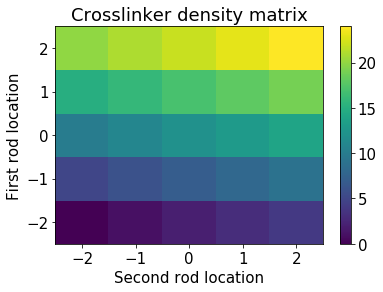

In [5]:
# Build uniform distribution
C = np.arange(25).reshape(5,5)
print(C)
ds = 1.0
s = np.linspace(-2., 2, 5)
s_cen = np.append(s,s[-1]+ds)-.5*ds
c = plt.pcolormesh(s_cen, s_cen, C)
plt.title("Crosslinker density matrix")
plt.ylabel("First rod location")
plt.xlabel("Second rod location")
plt.colorbar(c)

In [6]:
# First moments
p1_mat = np.einsum('ij,i->ij',C,s)*ds*ds
P1 = np.einsum('ij,i->',C,s)*ds*ds
p2_mat = np.einsum('ij,j->ij',C,s)*ds*ds
P2 = np.einsum('ij,j->',C,s)*ds*ds

print(p1_mat)
print("First moment:", P1)
print(p2_mat)
print("Second moment:", P2)


[[ 0. -2. -4. -6. -8.]
 [-5. -6. -7. -8. -9.]
 [ 0.  0.  0.  0.  0.]
 [15. 16. 17. 18. 19.]
 [40. 42. 44. 46. 48.]]
First moment: 250.0
[[  0.  -1.   0.   3.   8.]
 [-10.  -6.   0.   8.  18.]
 [-20. -11.   0.  13.  28.]
 [-30. -16.   0.  18.  38.]
 [-40. -21.   0.  23.  48.]]
Second moment: 50.0


First moment is higher than second moment because differences between ends of rods are greater for the first rod variable

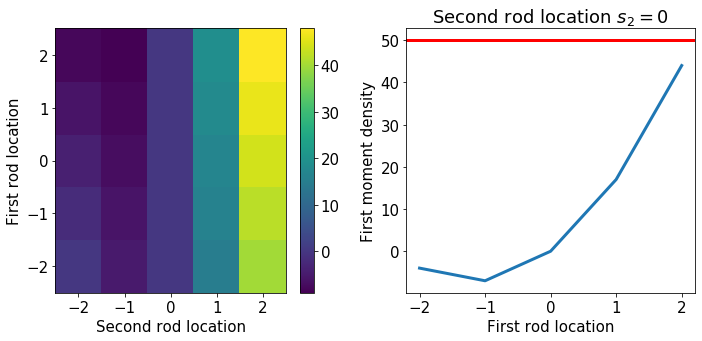

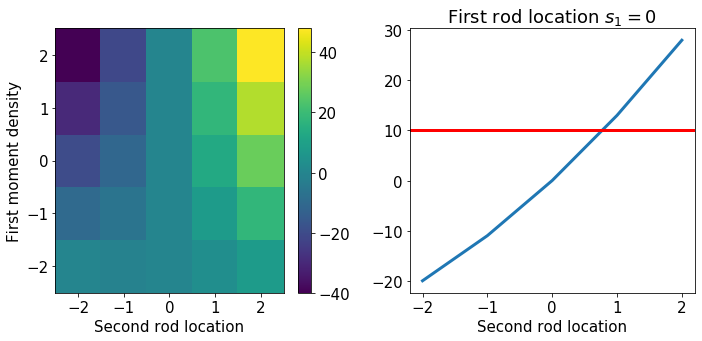

In [7]:
# Plotting first and second moments
fig1, (ax0, ax1) = plt.subplots(1,2, figsize=(10,5))
c = ax0.pcolormesh(s_cen,s_cen,p1_mat.T)
fig1.colorbar(c, ax=ax0)
ax1.plot(s,C[:,2]*s)
ax1.axhline(np.sum(C[:,2]*s),c='r')
ax0.set_ylabel("First rod location")
ax0.set_xlabel("Second rod location")
ax1.set_title("Second rod location $s_2 = 0$")
ax1.set_ylabel("First moment density")
ax1.set_xlabel("First rod location")
plt.tight_layout()

fig2, (ax2, ax3) = plt.subplots(1,2, figsize=(10,5))
c = ax2.pcolormesh(s_cen, s_cen,p2_mat)
fig2.colorbar(c, ax=ax2)
ax3.plot(s,C[2,:]*s)
ax3.axhline(np.sum(C[2,:]*s),c='r')
ax2.set_ylabel("First rod location")
ax2.set_xlabel("Second rod location")
ax3.set_title("First rod location $s_1 = 0$")
ax2.set_ylabel("First moment density")
ax3.set_xlabel("Second rod location")
plt.tight_layout()

In [8]:
# Second moments
s_sqr = s*s
u11_mat = np.einsum('ij,i,j->ij',C,s,s)*ds*ds
u20_mat = np.einsum('ij,i->ij',C,s_sqr)*ds*ds
u02_mat = np.einsum('ij,j->ij',C,s_sqr)*ds*ds
u11 = np.einsum('ij->',u11_mat)
u20 = np.einsum('ij->',u20_mat)
u02 = np.einsum('ij->',u02_mat)
print("u11:", u11)
print("u20:", u20)
print("u02:", u02)

u11: 0.0
u20: 600.0
u02: 600.0


Text(0.5, 0, 'Second rod location')

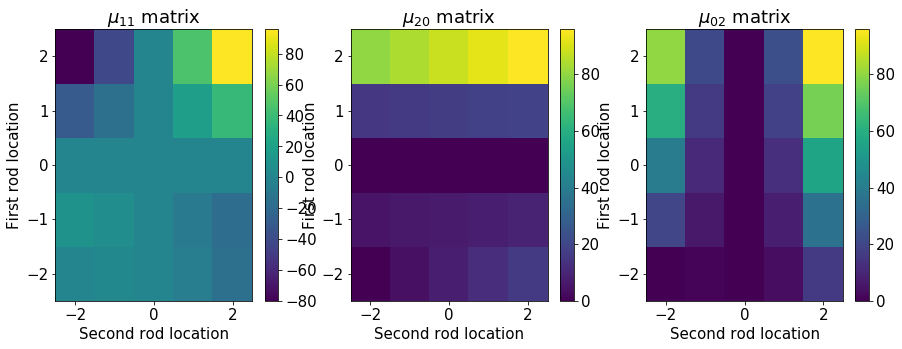

In [9]:
fig, (ax0, ax1, ax2) = plt.subplots(1,3, figsize=(15,5))
ax0.set_title('$\mu_{11}$ matrix')
c = ax0.pcolormesh(s_cen,s_cen,u11_mat)
fig.colorbar(c, ax=ax0)
ax1.set_title('$\mu_{20}$ matrix')
c = ax1.pcolormesh(s_cen,s_cen,u20_mat)
fig.colorbar(c, ax=ax1)
ax2.set_title('$\mu_{02}$ matrix')
c = ax2.pcolormesh(s_cen,s_cen,u02_mat)
fig.colorbar(c, ax=ax2)
ax0.set_ylabel("First rod location")
ax0.set_xlabel("Second rod location")
ax1.set_ylabel("First rod location")
ax1.set_xlabel("Second rod location")
ax2.set_ylabel("First rod location")
ax2.set_xlabel("Second rod location")

P1: 250.0
P2: 50.0
u11: 0.0
u20: 600.0
u02: 600.0


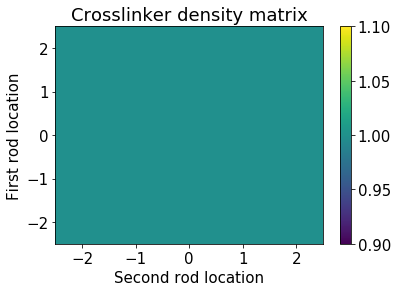

In [10]:
D = np.ones((5,5))
c = plt.pcolormesh(s_cen, s_cen, D)
plt.colorbar(c)
s_sqr = s*s
# First moments
p1_mat1 = np.einsum('ij,i->ij',D,s)*ds*ds
P1_1 = np.einsum('ij,i->',D,s)*ds*ds
p2_mat1 = np.einsum('ij,j->ij',D,s)*ds*ds
P2_1 = np.einsum('ij,j->',D,s)*ds*ds
# Second moments
u11_mat1 = np.einsum('ij,i,j->ij',D,s,s)*ds*ds
u20_mat1 = np.einsum('ij,i->ij',D,s_sqr)*ds*ds
u02_mat1 = np.einsum('ij,j->ij',D,s_sqr)*ds*ds
u11_1 = np.einsum('ij->',u11_mat1)
u20_1 = np.einsum('ij->',u20_mat1)
u02_1 = np.einsum('ij->',u02_mat1)
plt.title("Crosslinker density matrix")
plt.ylabel("First rod location")
plt.xlabel("Second rod location")

print("P1:", P1)
print("P2:", P2)
print("u11:", u11)
print("u20:", u20)
print("u02:", u02)

P1: 0.0
P2: 0.0


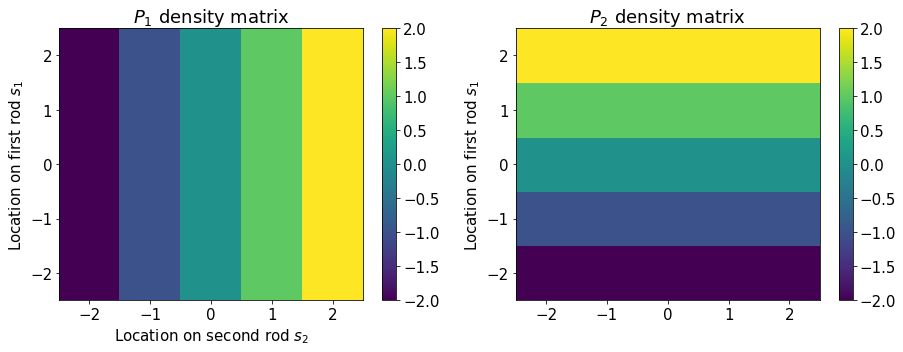

In [11]:
with plt.style.context(graph_stl):
    fig, (ax0, ax1) = plt.subplots(1,2, figsize=(15,5))
    ax0.set_title('$P_{1}$ density matrix')
    c = ax0.pcolormesh(s_cen,s_cen,p1_mat1.T)
    fig.colorbar(c, ax=ax0)
    ax1.set_title('$P_{2}$ density matrix')
    c = ax1.pcolormesh(s_cen,s_cen,p2_mat1.T)
    fig.colorbar(c, ax=ax1)
    ax0.set_ylabel("Location on first rod $s_1$")
    ax0.set_xlabel("Location on second rod $s_2$")
    ax1.set_ylabel("Location on first rod $s_1$")
    ax2.set_xlabel("Location on second rod $s_2$")


    print("P1:", P1_1)
    print("P2:", P2_1)


u11: 0.0
u20: 600.0
u02: 600.0


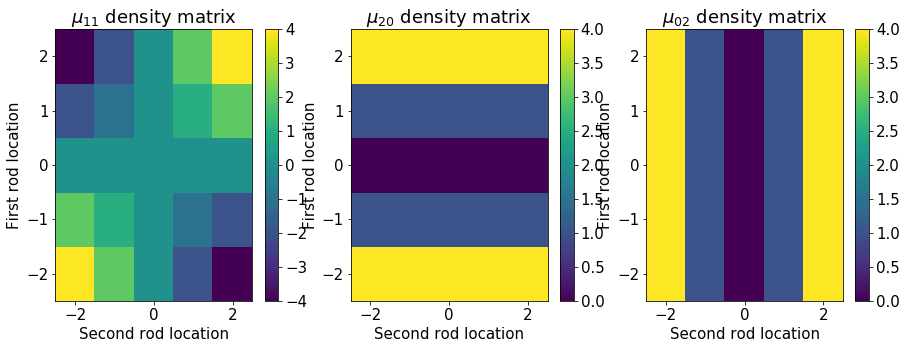

In [12]:
fig, (ax0, ax1, ax2) = plt.subplots(1,3, figsize=(15,5))
ax0.set_title('$\mu_{11}$ density matrix')
c = ax0.pcolormesh(s_cen,s_cen,u11_mat1)
fig.colorbar(c, ax=ax0)
ax1.set_title('$\mu_{20}$ density matrix')
c = ax1.pcolormesh(s_cen,s_cen,u20_mat1)
fig.colorbar(c, ax=ax1)
ax2.set_title('$\mu_{02}$ density matrix')
c = ax2.pcolormesh(s_cen,s_cen,u02_mat1)
fig.colorbar(c, ax=ax2)
ax0.set_ylabel("First rod location")
ax0.set_xlabel("Second rod location")
ax1.set_ylabel("First rod location")
ax1.set_xlabel("Second rod location")
ax2.set_ylabel("First rod location")
ax2.set_xlabel("Second rod location")

print("u11:", u11)
print("u20:", u20)
print("u02:", u02)

In [13]:
u11_arr = np.stack((u11, u11_1))
u02_arr = np.stack((u02, u02_1))
u20_arr = np.stack((u20,u20_1))
u_arr = np.stack((u11_arr, u20_arr, u02_arr), axis=-1)
print(u_arr)

[[  0. 600. 600.]
 [  0.  50.  50.]]


# Boundary term graphs

In [14]:
def graph_pde_boundary_terms(fig, axarr, h5_data):
    params = yaml.safe_load(h5_data.attrs['params'])
    dt = params['twrite']
    time = h5_data['time']
    
    zeroth_bterms = h5_data['analysis/xl_analysis/zeroth_boundary_terms'][...]
    axarr[0,0].plot(time,zeroth_bterms[:,0], c='tab:green', label='B$_j^0$')
    axarr[0,0].plot(time,zeroth_bterms[:,1], c='tab:purple', label='B$_i^0$')
    axarr[0,0].set_ylabel('Motor number boundary term (nm$^{-1}$)')
    axarr[0,0].legend()
    axarr[1,0].plot(time,zeroth_bterms[:,2], c='tab:green', label='$\partial_{s_i}$B$_j^0$')
    axarr[1,0].plot(time,zeroth_bterms[:,3], c='tab:purple', label='$\partial_{s_j}$B$_i^0$')
    axarr[1,0].set_ylabel('Change in motor number boundary term (nm$^{-2}$)')
    axarr[1,0].set_xlabel('Time (sec)')
    axarr[1,0].legend()
    
    first_bterms = h5_data['analysis/xl_analysis/first_boundary_terms'][...]
    axarr[0,1].plot(time,first_bterms[:,0], c='tab:green', label='B$_j^1$')
    axarr[0,1].plot(time,first_bterms[:,1], c='tab:purple', label='B$_i^1$')
    axarr[0,1].set_ylabel(r'First moment boundary term')
    axarr[0,1].legend()
    axarr[1,1].plot(time,first_bterms[:,2], c='tab:green', label='$\partial_{s_i}$B$_j^1$')
    axarr[1,1].plot(time,first_bterms[:,3], c='tab:purple', label='$\partial_{s_j}$B$_i^1$')
    axarr[1,1].set_ylabel('Change in first moment boundary term (nm$^{-1}$)')
    axarr[1,1].legend()
    axarr[1,1].set_xlabel('Time (sec)')
    
    second_bterms = h5_data['analysis/xl_analysis/second_boundary_terms'][...]
    axarr[0,2].plot(time,second_bterms[:,0], c='tab:green', label='B$_j^2$')
    axarr[0,2].plot(time,second_bterms[:,1], c='tab:purple', label='B$_i^2$')
    axarr[0,2].set_ylabel(r'Second moment boundary term (nm)')
    axarr[0,2].legend()
    axarr[1,2].plot(time,second_bterms[:,2], c='tab:green', label='$\partial_{s_i}$B$_j^2$')
    axarr[1,2].plot(time,second_bterms[:,3], c='tab:purple', label='$\partial_{s_j}$B$_i^2$')
    axarr[1,2].set_ylabel(r'Change in second moment boundary term')
    axarr[1,2].legend()
    axarr[1,2].set_xlabel('Time (sec)')
    
    third_bterms = h5_data['analysis/xl_analysis/third_boundary_terms'][...]
    axarr[0,3].plot(time,third_bterms[:,0], c='tab:green', label='B$_j^3$')
    axarr[0,3].plot(time,third_bterms[:,1], c='tab:purple', label='B$_i^3$')
    axarr[0,3].set_ylabel(r'Third moment boundary term (nm$^{2}$)')
    axarr[0,3].legend()
    axarr[1,3].plot(time,third_bterms[:,2], c='tab:green', label='$\partial_{s_i}$B$_j^3$')
    axarr[1,3].plot(time,third_bterms[:,3], c='tab:purple', label='$\partial_{s_j}$B$_i^3$')
    axarr[1,3].set_ylabel('Change in third moment boundary term (nm)')
    axarr[1,3].legend()
    axarr[1,3].set_xlabel('Time (sec)')
    
    plt.tight_layout()

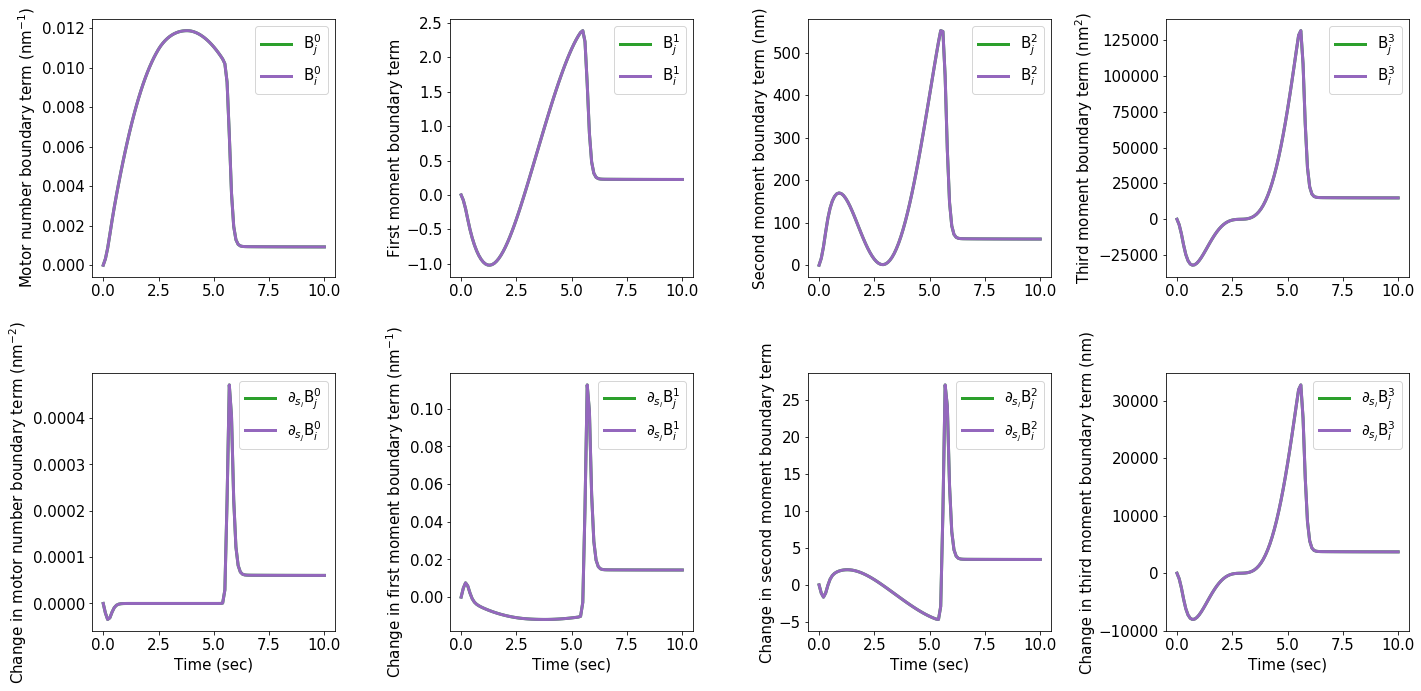

In [15]:
try:
    h5_data = h5py.File(Path('/Users/adamlamson/projects/DATA/XlinkProb/testing/FP_GenMotion_MotorUW_tests/20-03-03_GMUW_antipara_wca_L500/PDEGenMotionMotorUWSolver.h5'),'r')
    fig, axarr = plt.subplots(2, 4, figsize=(20,10))
    graph_pde_boundary_terms(fig, axarr, h5_data)
    
except:
    print("Could not open")
    raise
finally:
    h5_data.close()

# Stretch analysis

In [3]:
def h_edge(ds, dy, n):
    return np.sqrt(dy*dy + np.power((n-.5)*ds,2))

In [5]:
try:
    h5_fname = "/Users/adamlamson/projects/DATA/MethodsPaper/20-03-22_runs/PDE_antipara_stat.h5"
    anal = PDEAnalyzer(h5_fname, 'overwrite')
    
    h_distr_arr = anal.h_distr_dset[...]
    plt.pcolormesh(h_distr_arr)
    fil_bins = anal.h_distr_dset.attrs['bin_edges']
    bin_width = fil_bins[1]-fil_bins[0]
    #/(bin_width* np.sum(h_distr, axis=1))[:, None], ls='steps' 
    #plot(bin_edges[:-1]*nm, stretch_num_avg/(bin_width*np.sum(stretch_num_avg)), ls='steps')
except:
    print("Analysis failed!")
    raise
finally:
    anal.save()

{'L1': 1000.0, 'L2': 1000.0, 'R1_pos': [0.0, 0.0, 0.0], 'R1_vec': [0.0, 1.0, 0.0], 'R2_pos': [0.0, 0.0, 25.0], 'R2_vec': [0.0, -1.0, 0.0], 'beta': 0.243309002, 'boundary_conditions': 'zero', 'co': 0.00927, 'ds': 0.5, 'dt': 0.0001, 'fs': 2.0, 'ho': 0.0, 'initial_condition': 'empty', 'ko': 1.54, 'ks': 0.03715512882326001, 'name': 'PDE_antipara_stat', 'nsteps': 200000, 'nt': 20, 'rod_diameter': 25, 'solver_type': 'PDEGenOrientMotorUWSolver', 'twrite': 0.2, 'viscosity': 1e-06, 'vo': 50.0}
Max density:  0.00049781473
Analysis failed!


NameError: name 'anal' is not defined

In [ ]:
t = 20
plt.plot(fil_bins[:-1], h_distr_arr[t]/(bin_width*np.sum(h_distr_arr[t])), lw=.4,ls='steps')

In [ ]:
try:
    t=20
    h5_fname = "/Users/adamlamson/projects/DATA/MethodsPaper/20-03-22_runs/PDE_antipara_stat.h5"
    anal = PDEAnalyzer(h5_fname, 'load')
    ds = anal._params['ds']
    dy = abs(anal.R2_pos[t][2]-anal.R1_pos[t][2])
    h_distr_arr = anal.h_distr_dset[t]
    bin_edges = anal.h_distr_dset.attrs['bin_edges']
    bin_width = bin_edges[1]-bin_edges[0]
    bin_centers = bin_edges[:-1] + .5*bin_width
    print(bin_width)
    print(bin_centers.size)
    masked_left_bin_edges = np.ma.masked_where(h_distr_arr == 0, bin_edges[:-1])
    left_bin_edges = np.asarray(masked_left_bin_edges[~masked_left_bin_edges.mask].tolist())
    left_bin_edges = np.append(left_bin_edges, bin_edges[-1])
    
    print(masked_left_bin_edges)
    masked_h_distr = np.ma.masked_where(h_distr_arr == 0, h_distr_arr)
    clean_h_distr = np.asarray(masked_h_distr[~masked_h_distr.mask].tolist())
    true_bin_widths = left_bin_edges[1:] - left_bin_edges[:-1] 
    left_bin_edges = np.append(0,left_bin_edges)
    true_bin_widths = np.append(left_bin_edges[1]-left_bin_edges[0],true_bin_widths)
    clean_h_distr = np.append(0, clean_h_distr)
    print(true_bin_widths)
    plt.plot(left_bin_edges[:-1] + .5*bin_width, clean_h_distr/(true_bin_widths*np.sum(clean_h_distr)), ds='steps-post')
except:
    print("Analysis failed!")
    raise
finally:
    anal.save()

# Work analysis

{'L1': 500.0, 'L2': 500.0, 'R1_pos': [0.0, 0.0, 0.0], 'R1_vec': [0.0, 1.0, 0.0], 'R2_pos': [0.0, 0.0, 25.0], 'R2_vec': [0.0, -1.0, 0.0], 'beta': 0.243309002, 'boundary_conditions': 'zero', 'co': 0.00927, 'ds': 2.0, 'dt': 0.0005, 'fs': 2.0, 'ho': 0.0, 'initial_condition': 'empty', 'ko': 0.77, 'ks': 0.03715512882326001, 'name': 'PDEGenMotionMotorUWSolver', 'nsteps': 20000, 'nt': 10, 'rod_diameter': 25, 'solver_type': 'PDEGenMotionMotorUWSolver', 'steric_interactions': 'wca', 'twrite': 0.1, 'viscosity': 1e-06, 'vo': 50.0}
Max density:  0.00053428765
analysis time: 1.2806131839752197
[[ 0.00000000e+00 -1.08188093e+00 -1.23394501e+00]
 [ 0.00000000e+00 -3.67433453e+00  2.06169009e-01]
 [ 0.00000000e+00 -4.31998396e+00  1.44380033e-01]
 [ 0.00000000e+00 -4.40072918e+00  9.89833474e-02]
 [ 0.00000000e+00 -4.44239044e+00  6.35287762e-02]
 [ 0.00000000e+00 -4.49137878e+00  3.46099138e-02]
 [ 0.00000000e+00 -4.48583794e+00  9.66107845e-03]
 [ 0.00000000e+00 -4.49699593e+00 -1.20332241e-02]
 [ 0.

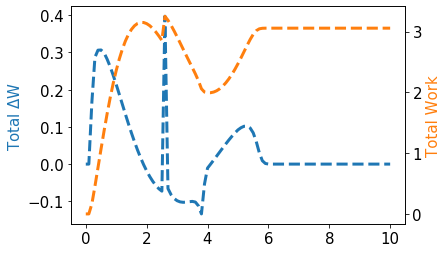

In [33]:
try:
    h5_fname = "/Users/adamlamson/projects/DATA/XlinkProb/testing/FP_GenMotion_MotorUW_tests/20-03-03_GMUW_antipara_wca_L500/PDEGenMotionMotorUWSolver.h5"
    anal = PDEAnalyzer(h5_fname, 'overwrite')
    t = anal.time
    
    print(anal.R1_pos[1:] - anal.R1_pos[:-1])
    print(anal._h5_data['/interaction_data/force_data'][1:, 0, :])
    #tot_dwork = anal.dwl_i + anal.dwl_j + anal.dwr_i + anal.dwr_j
    #print(anal.dwl_j)
    
    #dr_i = np.zeros(anal.R1_pos.shape)
    #dr_i[:-1] = anal.R1_pos[1:] - anal.R1_pos[:-1]
    f_i = anal._h5_data['/interaction_data/force_data'][:, 0, :]
    #dwl_i = np.zeros(anal.R1_pos.shape[0])
    #dwl_i[:-1] = np.einsum('ij,ij->i', dr_i[:-1], f_i[:-1])
    
    dr_i = np.zeros(anal.R1_pos.shape)
    dr_i[1:] = anal.R1_pos[1:] - anal.R1_pos[:-1]
    f_i = anal._h5_data['/interaction_data/force_data'][:, 0, :]
    dwl_i = np.zeros(anal.R1_pos.shape[0])
    dwl_i[1:] = np.einsum('ij,ij->i', dr_i[1:], f_i[:-1])
    print(dwl_i)
    
    #print(anal.dwr_i + anal.dwr_j)
    tot_work = np.cumsum(tot_dwork)
    fig, ax1 = plt.subplots()
    #ax1.plot(t, tot_dwork, color='C0')
    ax1.set_ylabel('Total $\Delta$W ', color='C0')
    ax1.plot(t, dwl_i, color='C0', ls='--')
    #ax1.plot(t, anal.dwr_i+anal.dwr_j, color='C0', ls=':')
    
    ax2 = ax1.twinx()
    #ax2.plot(t, tot_work, color='C1')
    ax2.plot(t, np.cumsum(dwl_i), color='C1', ls='--')
    #ax2.plot(t, np.cumsum(anal.dwr_i+anal.dwr_j), color='C1', ls=':')
    ax2.set_ylabel('Total Work', color='C1')
    

except:
    print("Analysis failed!")
    raise
finally:
    anal.save()

{'L1': 500.0, 'L2': 500.0, 'R1_pos': [0.0, 0.0, 0.0], 'R1_vec': [0.0, 1.0, 0.0], 'R2_pos': [25.0, 0.0, 0.0], 'R2_vec': [0.0, 0.0, 1.0], 'beta': 0.243309002, 'boundary_conditions': 'zero', 'co': 0.00927, 'ds': 2.0, 'dt': 0.0005, 'fs': 2.0, 'ho': 0.0, 'initial_condition': 'empty', 'ko': 0.77, 'ks': 0.03715512882326001, 'name': 'PDEGenMotionMotorUWSolver', 'nsteps': 20000, 'nt': 10, 'rod_diameter': 25, 'solver_type': 'PDEGenMotionMotorUWSolver', 'steric_interactions': 'wca', 'twrite': 0.1, 'viscosity': 1e-06, 'vo': 50.0}
Max density:  0.00036166998
analysis time: 1.3931801319122314
[ 0.          0.          0.03396699  0.13296876  0.29776992  0.52470161
  0.80409361  1.12290592  1.46503789  1.81960216  2.17700142  2.53011702
  2.87361244  3.20410222  3.51896223  3.81661583  4.0960747   4.35735135
  4.60022298  4.82494949  5.03243906  5.22295915  5.39764513  5.55716672
  5.70235285  5.83393453  5.9527739   6.06010713  6.15642413  6.24221217
  6.31825751  6.38528871  6.4437023   6.49387725 

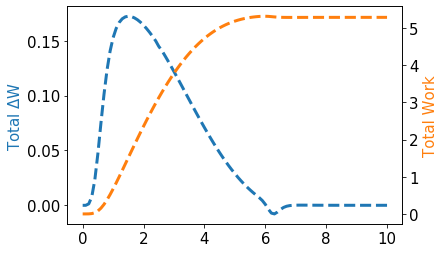

In [28]:
try:
    h5_fname = "/Users/adamlamson/projects/DATA/XlinkProb/testing/FP_GenMotion_MotorUW_tests/20-03-03_GMUW_perp_wca_L500/PDEGenMotionMotorUWSolver.h5"
    anal = PDEAnalyzer(h5_fname, 'overwrite')
    t = anal.time
    tot_dwork = anal.dwl_i + anal.dwl_j + anal.dwr_i + anal.dwr_j
    print(tot_dwork)
    tot_work = np.cumsum(tot_dwork)
    fig, ax1 = plt.subplots()
    #ax1.plot(t, tot_dwork, color='C0')
    ax1.set_ylabel('Total $\Delta$W ', color='C0')
    ax1.plot(t, anal.dwl_i+anal.dwl_j, color='C0', ls='--')
    #ax1.plot(t, anal.dwr_i+anal.dwr_j, color='C0', ls=':')
    
    ax2 = ax1.twinx()
    #ax2.plot(t, tot_work, color='C1')
    ax2.plot(t, np.cumsum(anal.dwl_i+anal.dwl_j), color='C1', ls='--')
    #ax2.plot(t, np.cumsum(anal.dwr_i+anal.dwr_j), color='C1', ls=':')
    ax2.set_ylabel('Total Work', color='C1')
    

except:
    print("Analysis failed!")
    raise
finally:
    anal.save()

# Optical trap graphs